# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv)

### Step 3. Assign it to a variable apple

In [3]:
# url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Time_Series/Apple_Stock/appl_1980_2014.csv'
url = '/Users/markyashar/sf16_ids1/class_materials/pandas_exercises/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple = pd.read_csv(url)

apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 4.  Check out the type of the columns

In [4]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [5]:
apple.Date = pd.to_datetime(apple.Date)

# Signature: pd.to_datetime(*args, **kwargs)
# Docstring:
# Convert argument to datetime.

# Parameters
# ----------
# arg : string, datetime, list, tuple, 1-d array, or Series
# errors : {'ignore', 'raise', 'coerce'}, default 'raise'

#     - If 'raise', then invalid parsing will raise an exception
#     - If 'coerce', then invalid parsing will be set as NaT
#     - If 'ignore', then invalid parsing will return the input
# dayfirst : boolean, default False
#     Specify a date parse order if `arg` is str or its list-likes.
#     If True, parses dates with the day first, eg 10/11/12 is parsed as
#     2012-11-10.
#     Warning: dayfirst=True is not strict, but will prefer to parse
#     with day first (this is a known bug, based on dateutil behavior).
# yearfirst : boolean, default False
#     Specify a date parse order if `arg` is str or its list-likes.

#     - If True parses dates with the year first, eg 10/11/12 is parsed as
#       2010-11-12.
#     - If both dayfirst and yearfirst are True, yearfirst is preceded (same
#       as dateutil).

#     Warning: yearfirst=True is not strict, but will prefer to parse
#     with year first (this is a known bug, based on dateutil beahavior).

#     .. versionadded: 0.16.1

# utc : boolean, default None
#     Return UTC DatetimeIndex if True (converting any tz-aware
#     datetime.datetime objects as well).
# box : boolean, default True

#     - If True returns a DatetimeIndex
#     - If False returns ndarray of values.
# format : string, default None
#     strftime to parse time, eg "%d/%m/%Y", note that "%f" will parse
#     all the way up to nanoseconds.
# exact : boolean, True by default

#     - If True, require an exact format match.
#     - If False, allow the format to match anywhere in the target string.

# unit : unit of the arg (D,s,ms,us,ns) denote the unit in epoch
#     (e.g. a unix timestamp), which is an integer/float number.
# infer_datetime_format : boolean, default False
#     If no `format` is given, try to infer the format based on the first
#     datetime string. Provides a large speed-up in many cases.

# Returns
# -------
# ret : datetime if parsing succeeded.
#     Return type depends on input:

#     - list-like: DatetimeIndex
#     - Series: Series of datetime64 dtype
#     - scalar: Timestamp

#     In case when it is not possible to return designated types (e.g. when
#     any element of input is before Timestamp.min or after Timestamp.max)
#     return will have datetime.datetime type (or correspoding array/Series).


apple['Date'].head()

0   2014-07-08
1   2014-07-07
2   2014-07-03
3   2014-07-02
4   2014-07-01
Name: Date, dtype: datetime64[ns]

### Step 6.  Set the date as the index

In [6]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


### Step 7.  Is there any duplicate dates?

In [36]:
# NO! All are unique
apple.index.is_unique

# Type:        bool
# String form: True
# Docstring:
# bool(x) -> bool

# Returns True when the argument x is true, False otherwise.
# The builtins True and False are the only two instances of the class bool.
# The class bool is a subclass of the class int, and cannot be subclassed.

True

### Step 8.  Oops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [8]:
apple.sort_index(ascending = True).head()

# Signature: apple.sort_index(axis=0, level=None, ascending=True, inplace=False, kind='quicksort', na_position='last',
#                             sort_remaining=True, by=None)
# Docstring:
# Sort object by labels (along an axis)

# Parameters
# ----------
# axis : index, columns to direct sorting
# level : int or level name or list of ints or list of level names
#     if not None, sort on values in specified index level(s)
# ascending : boolean, default True
#     Sort ascending vs. descending
# inplace : bool
#     if True, perform operation in-place
# kind : {`quicksort`, `mergesort`, `heapsort`}
#      Choice of sorting algorithm. See also ndarray.np.sort for more
#      information.  `mergesort` is the only stable algorithm. For
#      DataFrames, this option is only applied when sorting on a single
#      column or label.
# na_position : {'first', 'last'}
#      `first` puts NaNs at the beginning, `last` puts NaNs at the end
# sort_remaining : bool
#     if true and sorting by level and index is multilevel, sort by other
#     levels too (in order) after sorting by specified level

# Returns
# -------
# sorted_obj : DataFrame

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


### Step 9. Get the last business day of each month

In [9]:
apple_month = apple.resample('BM').mean()

# Signature: apple.resample(rule, how=None, axis=0, fill_method=None, closed=None, label=None, convention='start',
#                           kind=None, loffset=None, limit=None, base=0)
# Docstring:
# Convenience method for frequency conversion and resampling of regular
# time-series data.

# Parameters
# ----------
# rule : string
#     the offset string or object representing target conversion
# axis : int, optional, default 0
# closed : {'right', 'left'}
#     Which side of bin interval is closed
# label : {'right', 'left'}
#     Which bin edge label to label bucket with
# convention : {'start', 'end', 's', 'e'}
# loffset : timedelta
#     Adjust the resampled time labels
# base : int, default 0
#     For frequencies that evenly subdivide 1 day, the "origin" of the
#     aggregated intervals. For example, for '5min' frequency, base could
#     range from 0 through 4. Defaults to 0


apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,25862523,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7249866,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4231831,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7962690,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6392000,0.423333


### Step 10.  What is the difference in days between the first day and the last day

In [10]:
(apple.index.max() - apple.index.min()).days

12261

### Step 11.  How many months do we have in the data?

In [11]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

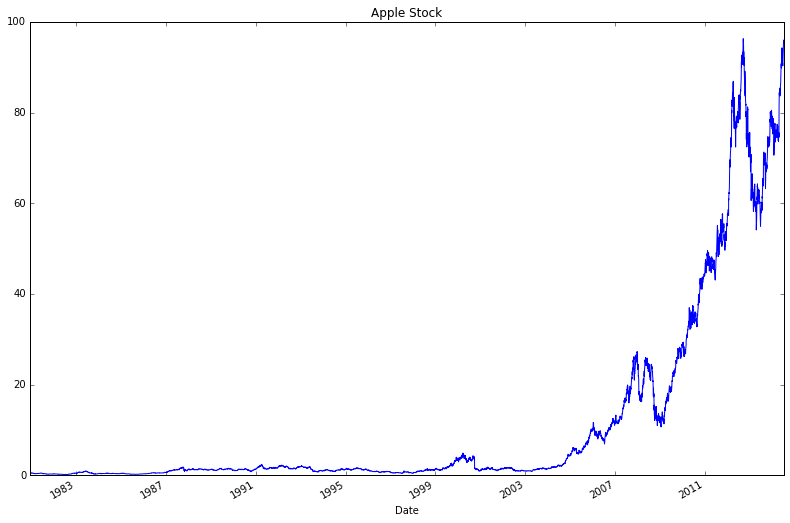

In [12]:
# makes the plot and assign it to a variable
appl_open = apple['Adj Close'].plot(title = "Apple Stock")

# Type:           FramePlotMethods
# String form:    <pandas.tools.plotting.FramePlotMethods object at 0x1158e4890>
# File:           ~/anaconda/lib/python2.7/site-packages/pandas/tools/plotting.py
# Signature:      apple.plot(self, x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, 
#                            layout=None, figsize=None, use_index=True, title=None, grid=None, legend=True, style=None,
#                            logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, ylim=None, 
#                            rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, 
#                            secondary_y=False, sort_columns=False, **kwds)
# Docstring:
# DataFrame plotting accessor and method

# Examples
# --------
# >>> df.plot.line()
# >>> df.plot.scatter('x', 'y')
# >>> df.plot.hexbin()

# These plotting methods can also be accessed by calling the accessor as a
# method with the ``kind`` argument:
# ``df.plot(kind='line')`` is equivalent to ``df.plot.line()``
# Call signature: apple.plot(x=None, y=None, kind='line', ax=None, subplots=False, sharex=None, sharey=False, layout=None, figsize=None, 
# use_index=True, title=None, grid=None, legend=True, style=None, logx=False, logy=False, loglog=False, xticks=None, yticks=None, xlim=None, 
# ylim=None, rot=None, fontsize=None, colormap=None, table=False, yerr=None, xerr=None, secondary_y=False, sort_columns=False, **kwds)
# Call docstring:
# Make plots of DataFrame using matplotlib / pylab.

# *New in version 0.17.0:* Each plot kind has a corresponding method on the
# ``DataFrame.plot`` accessor:
# ``df.plot(kind='line')`` is equivalent to
# ``df.plot.line()``.

# Parameters
# ----------
# data : DataFrame
# x : label or position, default None
# y : label or position, default None
#     Allows plotting of one column versus another
# kind : str
#     - 'line' : line plot (default)
#     - 'bar' : vertical bar plot
#     - 'barh' : horizontal bar plot
#     - 'hist' : histogram
#     - 'box' : boxplot
#     - 'kde' : Kernel Density Estimation plot
#     - 'density' : same as 'kde'
#     - 'area' : area plot
#     - 'pie' : pie plot
#     - 'scatter' : scatter plot
#     - 'hexbin' : hexbin plot
# ax : matplotlib axes object, default None
# subplots : boolean, default False
#     Make separate subplots for each column
# sharex : boolean, default True if ax is None else False
#     In case subplots=True, share x axis and set some x axis labels to
#     invisible; defaults to True if ax is None otherwise False if an ax
#     is passed in; Be aware, that passing in both an ax and sharex=True
#     will alter all x axis labels for all axis in a figure!
# sharey : boolean, default False
#     In case subplots=True, share y axis and set some y axis labels to
#     invisible
# layout : tuple (optional)
#     (rows, columns) for the layout of subplots
# figsize : a tuple (width, height) in inches
# use_index : boolean, default True
#     Use index as ticks for x axis
# title : string
#     Title to use for the plot
# grid : boolean, default None (matlab style default)
#     Axis grid lines
# legend : False/True/'reverse'
#     Place legend on axis subplots
# style : list or dict
#     matplotlib line style per column
# logx : boolean, default False
#     Use log scaling on x axis
# logy : boolean, default False
#     Use log scaling on y axis
# loglog : boolean, default False
#     Use log scaling on both x and y axes
# xticks : sequence
#     Values to use for the xticks
# yticks : sequence
#     Values to use for the yticks
# xlim : 2-tuple/list
# ylim : 2-tuple/list
# rot : int, default None
#     Rotation for ticks (xticks for vertical, yticks for horizontal plots)
# fontsize : int, default None
#     Font size for xticks and yticks
# colormap : str or matplotlib colormap object, default None
#     Colormap to select colors from. If string, load colormap with that name
#     from matplotlib.
# colorbar : boolean, optional
#     If True, plot colorbar (only relevant for 'scatter' and 'hexbin' plots)
# position : float
#     Specify relative alignments for bar plot layout.
#     From 0 (left/bottom-end) to 1 (right/top-end). Default is 0.5 (center)
# layout : tuple (optional)
#     (rows, columns) for the layout of the plot
# table : boolean, Series or DataFrame, default False
#     If True, draw a table using the data in the DataFrame and the data will
#     be transposed to meet matplotlib's default layout.
#     If a Series or DataFrame is passed, use passed data to draw a table.
# yerr : DataFrame, Series, array-like, dict and str
#     See :ref:`Plotting with Error Bars <visualization.errorbars>` for
#     detail.
# xerr : same types as yerr.
# stacked : boolean, default False in line and
#     bar plots, and True in area plot. If True, create stacked plot.
# sort_columns : boolean, default False
#     Sort column names to determine plot ordering
# secondary_y : boolean or sequence, default False
#     Whether to plot on the secondary y-axis
#     If a list/tuple, which columns to plot on secondary y-axis
# mark_right : boolean, default True
#     When using a secondary_y axis, automatically mark the column
#     labels with "(right)" in the legend
# kwds : keywords
#     Options to pass to matplotlib plotting method

# Returns
# -------
# axes : matplotlib.AxesSubplot or np.array of them


# changes the size of the graph
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)

### BONUS: Create your own question and answer it.

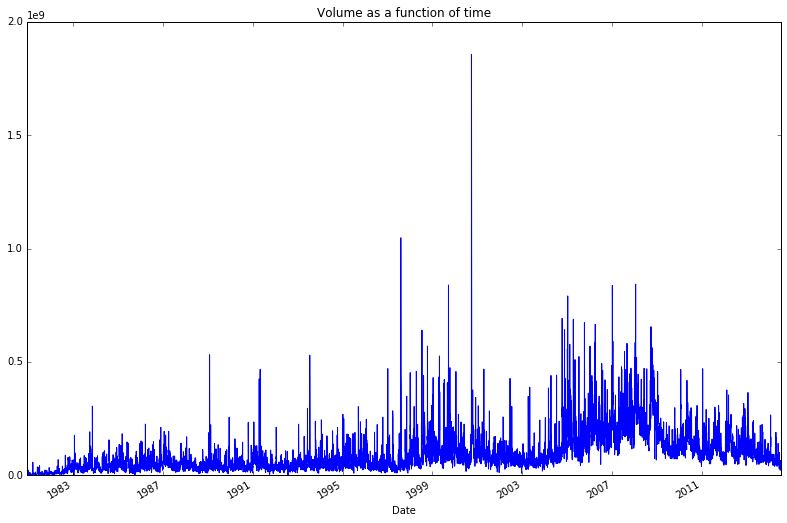

In [13]:
appl_open = apple['Volume'].plot(title = "Volume as a function of time")
fig = appl_open.get_figure()
fig.set_size_inches(13.5, 9)